In [16]:
import numpy as np
from pydicom import dcmread
from pydicom import multival
import os
from ipywidgets import interact
import ipywidgets as widgets

import matplotlib.pyplot as plt
from scipy import ndimage
import SimpleITK as sitk
from einops import rearrange
from tqdm import tqdm
import shutil
import torch
from einops import rearrange
from ipywidgets import interact
import ipywidgets as widgets

import matplotlib.pyplot as plt
import scipy
from skimage.transform import resize

In [ ]:
CT_Vol_DIR = "..data//lung1/CT_ONLY/vols"

In [18]:
for patient in os.listdir(CT_Vol_DIR):
    print(patient)
    break

LUNG1-412.pt


In [39]:
ct_volume = torch.load(f"{CT_Vol_DIR}/LUNG1-412.pt")
ct_volume = rearrange(ct_volume, "w b h -> b w h")

In [20]:
def plot_func(slice_num, img_):
    plt.imshow(img_[slice_num], plt.cm.gray)

interact(plot_func, slice_num = widgets.IntSlider(value=1, min=0,  max=133, step=1), img_=widgets.fixed(ct_volume))

interactive(children=(IntSlider(value=1, description='slice_num', max=133), Output()), _dom_classes=('widget-i…

<function __main__.plot_func(slice_num, img_)>

(100, 100, 50)


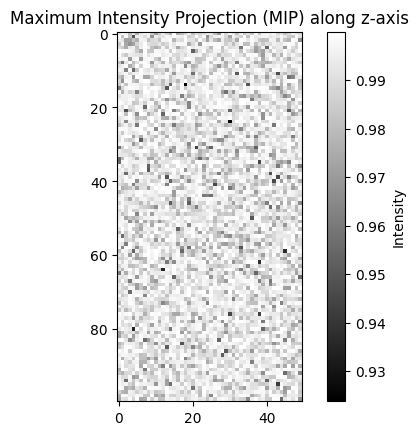

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def maximum_intensity_projection(volume, axis=0): 
    mip = np.max(volume, axis=axis)
    return mip

# Example CT volume (random values for demonstration)
ct_volume = np.random.rand(100, 100, 50)  # Dimensions: (z, y, x)
print(ct_volume.shape)
# Compute MIP along the z-axis (axis=0)
mip_z = maximum_intensity_projection(ct_volume, axis=0)

# Display the MIP
plt.imshow(mip_z, cmap='gray')
plt.title('Maximum Intensity Projection (MIP) along z-axis')
plt.colorbar(label='Intensity')
plt.show()

In [24]:
def maximum_intensity_projection(volume, axis=0): 
    mip, _ = torch.max(volume, dim=axis)
    return mip

print(ct_volume.shape)
mip_z = maximum_intensity_projection(ct_volume, axis=0)

# Display the MIP
plt.imshow(mip_z, cmap='gray')
plt.title('Maximum Intensity Projection (MIP) along z-axis')
plt.colorbar(label='Intensity')
plt.show() 

(100, 100, 50)


TypeError: max() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, *, Tensor out)
 * (Tensor input, Tensor other, *, Tensor out)
 * (Tensor input, int dim, bool keepdim, *, tuple of Tensors out)
 * (Tensor input, name dim, bool keepdim, *, tuple of Tensors out)


In [26]:
def create_mip_from_3D(volume_3d, nb_image=12):
    mip_list = []
    volume_3d += 1e-5
    for angle in np.linspace(0, 360, nb_image):
        vol_angle = scipy.ndimage.interpolation.rotate(volume_3d, angle)
        MIP = np.amax(vol_angle, axis=1)
        MIP -= 1e-5
        MIP[MIP < 1e-5] = 0
        MIP = np.flipud(MIP.T)
        mip_list.append(MIP)
    return mip_list

In [27]:
projections = create_mip_from_3D(ct_volume, nb_image=12)
print(len(projections))

/var/folders/tw/rf656c4561707rmf0t68blwh0000gp/T/ipykernel_2745/117330634.py:5: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  vol_angle = scipy.ndimage.interpolation.rotate(volume_3d, angle)


12


In [28]:
len(projections)

12

In [29]:
def plot_func(slice_num, img_):
    plt.imshow(img_[slice_num], plt.cm.gray)

interact(plot_func, slice_num = widgets.IntSlider(value=1, min=0,  max=11, step=1), img_=widgets.fixed(projections))

interactive(children=(IntSlider(value=1, description='slice_num', max=11), Output()), _dom_classes=('widget-in…

<function __main__.plot_func(slice_num, img_)>

In [41]:
import torch
import torch.nn.functional as F

def resize_slices(volume_):
    resized_volume = torch.zeros(300, 64, 64) 
    for i in range(volume_.shape[0]): 
        slice_2d = volume_[i, :, :]
        resized_slice = F.interpolate(slice_2d.unsqueeze(0).unsqueeze(0), size=(64, 64), mode='bilinear', align_corners=False)
        resized_volume[i, :, :] = resized_slice.squeeze()
    return resized_volume

In [42]:
small = resize_slices(ct_volume)

In [43]:
small.shape

torch.Size([300, 64, 64])

In [46]:
def plot_func(slice_num, img_):
    plt.imshow(img_[slice_num], plt.cm.gray)

interact(plot_func, slice_num = widgets.IntSlider(value=1, min=0,  max=299, step=1), img_=widgets.fixed(small))

interactive(children=(IntSlider(value=1, description='slice_num', max=299), Output()), _dom_classes=('widget-i…

<function __main__.plot_func(slice_num, img_)>